* Source from https://statkclee.github.io/nlp2/nlp-text-viz.html

In [1]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [2]:
!pip install wordcloud

# Wordcloud Eng

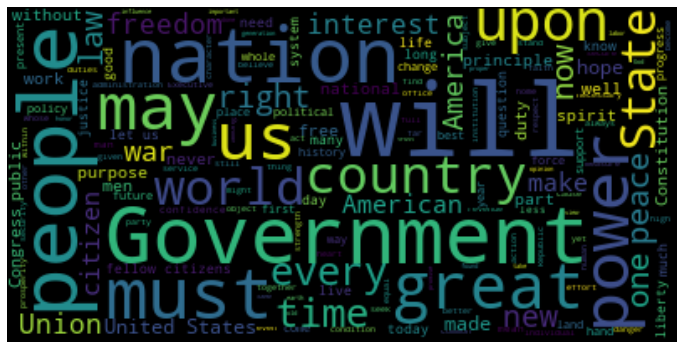

In [3]:
from nltk.corpus import inaugural
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = inaugural.raw()

wordcloud = WordCloud(max_font_size=60).generate(text)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Word Cloud 한글

/content
--2020-12-21 07:09:50--  https://fonts.google.com/download?family=Nanum%20Gothic%20Coding
Resolving fonts.google.com (fonts.google.com)... 108.177.97.138, 108.177.97.100, 108.177.97.102, ...
Connecting to fonts.google.com (fonts.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/NanumGothicCoding.zip’

/content/NanumGothi     [ <=>                ]   1.68M  --.-KB/s    in 0.02s   

2020-12-21 07:09:51 (103 MB/s) - ‘/content/NanumGothicCoding.zip’ saved [1767101]

Archive:  /content/NanumGothicCoding.zip
replace OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: OFL.txt                 
  inflating: NanumGothicCoding-Regular.ttf  
  inflating: NanumGothicCoding-Bold.ttf  


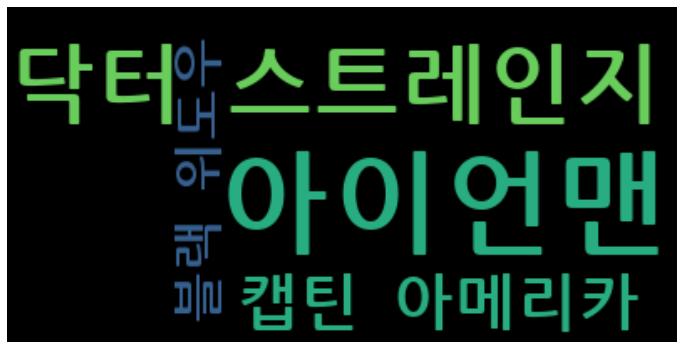

In [6]:
word_freq = {'아이언맨':10, '닥터 스트레인지':7, '캡틴 아메리카':3, '블랙 위도우':2}
%cd /content/
!wget https://fonts.google.com/download?family=Nanum%20Gothic%20Coding -O /content/NanumGothicCoding.zip
!unzip /content/NanumGothicCoding.zip
font_path = '/content/NanumGothicCoding-Bold.ttf'
wordcloud = WordCloud(font_path=font_path)
wordcloud = wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(12,9))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Lexical dispersion plot

In [10]:
nltk.download('genesis') 
nltk.download('nps_chat') 
nltk.download('webtext') 
nltk.download('treebank') 
nltk.download('gutenberg')

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


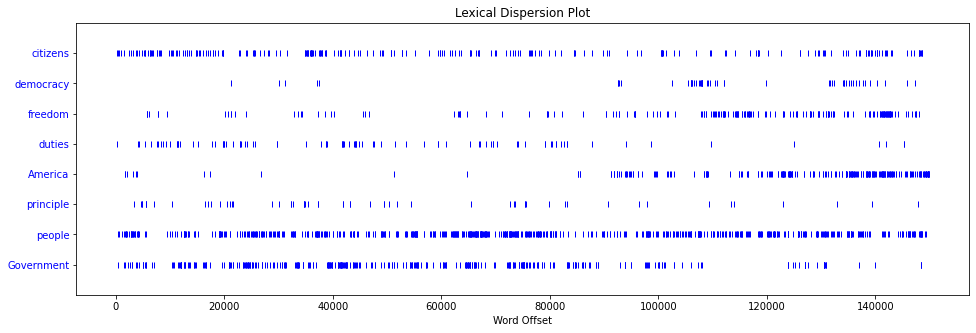

In [11]:
import nltk
from nltk.book import text4 as inaugural_speeches

plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)


#  Frequency distribution plot

Frequency distribution plot은 말뭉치에 포함된 단어 빈도를 뽑아내서 문서 전반을 이해하는데 도움을 준다. 이를 위해서 nltk.FreqDist() 메쏘드를 사용한다. 이 작업과정을 기술하면 다음과 같다.
1. brown 말뭉치에서 추출할 토픽을 리스트로 정의한다.
2. 불용어 사전을 정의해서 불필요한 단어를 제거한다.
3. nltk.FreqDist() 메쏘드를 통해서 가장 빈도수가 많은 단어를 튜플 리스트로 (단어, 빈도수) 형태로 뽑아낸다.
4. .most_common(), .plot() 메쏘드로 고빈도 단어를 뽑아내고 시각화한다.
* brown 말뭉치가 없는 경우 nltk.download('brown') 명령어로 다운로드 받는다.

In [18]:
nltk.download('brown') 
nltk.download('stopwords')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import brown
from nltk.corpus import stopwords

topics = ['government', 'news', 'religion', 'adventure', 'hobbies']

stop_words = set(stopwords.words('english'))

for topic in topics:
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))

government more : year , states , united , may , would
news more : said , would , one , last , two
religion more : god , world , one , may , new
adventure more : said , would , back , man , one
hobbies more : one , may , time , two , first


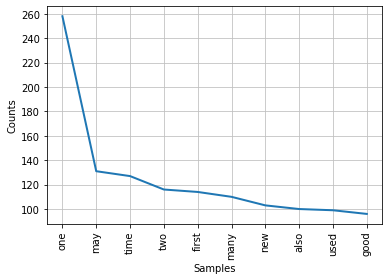

In [20]:
freqdist.plot(10)


# Lexical diversity dispersion plot


* 말뭉치에 포함된 단어를 기준으로 유일무이한 단어 갯수가 얼마인지를 나타내는 지표로 Lexical Diversity(LD)를 사용한다. 수식으로 표현하면 다음과 같다.

* Lexical Diversity(LD)=유일무이한 단어 갯수/총 단어갯수
 
* 만약 특정 말뭉치의 총단어 갯수가 100이고 이를 구성하는 유일무이한 단어가 20이면 Lexical Diversity는 0.2가 된다.

In [22]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2)

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

# calculate and print lexical diversity for each genre of the brown corpus
for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(f'{genre:<17}: \t {lex_div:<10} \t {lex_div_with_stop}')

adventure        : 	 0.26       	 0.13
belles_lettres   : 	 0.2        	 0.1
editorial        : 	 0.29       	 0.16
fiction          : 	 0.28       	 0.14
government       : 	 0.2        	 0.11
hobbies          : 	 0.25       	 0.13
humor            : 	 0.49       	 0.25
learned          : 	 0.16       	 0.09
lore             : 	 0.24       	 0.13
mystery          : 	 0.26       	 0.13
news             : 	 0.24       	 0.13
religion         : 	 0.32       	 0.16
reviews          : 	 0.39       	 0.21
romance          : 	 0.26       	 0.13
science_fiction  : 	 0.47       	 0.24


# Word length distribution plot

* brown 말뭉치 각 쟝르별로 단어 길이를 nltk.ConditionalFreqDist() 메쏘드로 시각화한다.


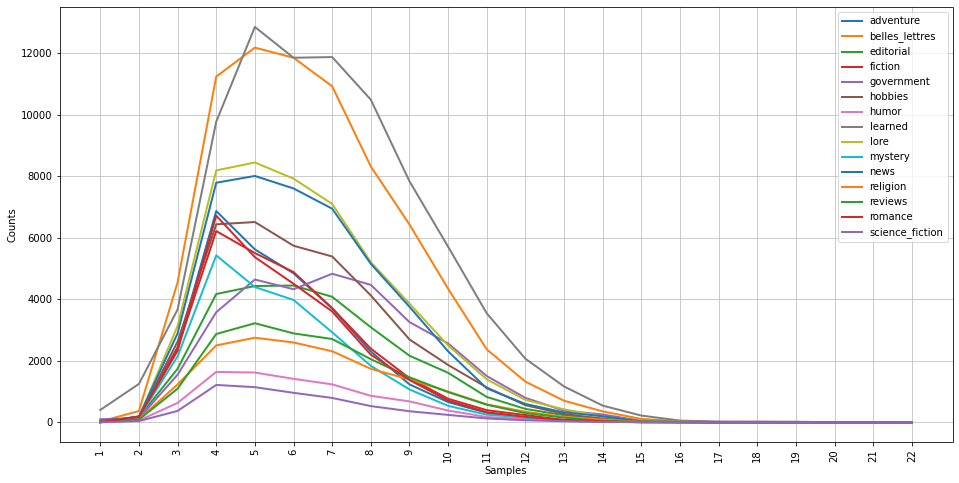

In [25]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

# N-gram frequency distribution plot

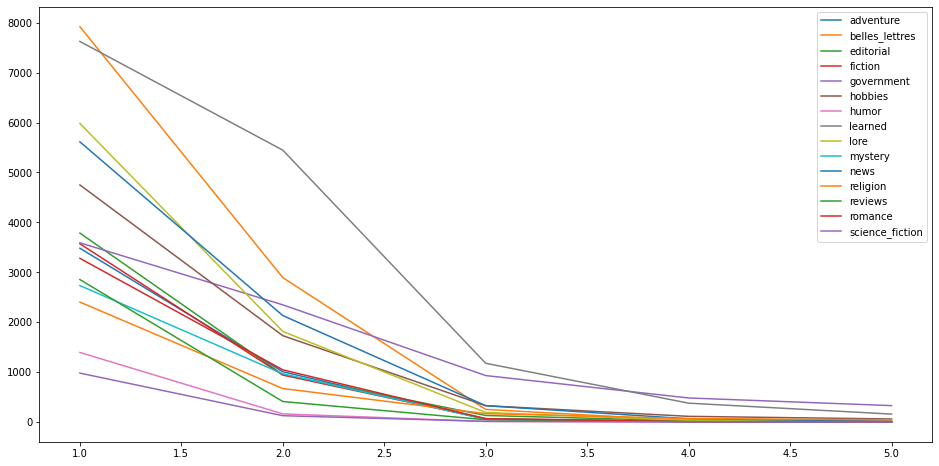

In [26]:
from nltk.util import ngrams
import numpy as np

plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)
plt.legend()
plt.show()